In [2]:
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
from datetime import datetime 
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [3]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [6]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [7]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

627

In [8]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hervey bay
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | sakakah
Processing Record 8 of Set 1 | mandera
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | banes
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | lavrentiya
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | wulanhaote
City not found. Skipping
Processing Record 17 of Set 1 | soanierana ivongo
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | lolua
City not found. Skipping
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | el higo
Processing Record 23 of Set 1 | butarit

Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | rawannawi
City not found. Skipping
Processing Record 42 of Set 4 | kwinana
Processing Record 43 of Set 4 | waipawa
Processing Record 44 of Set 4 | samusu
City not found. Skipping
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | balfron
Processing Record 47 of Set 4 | aligudarz
Processing Record 48 of Set 4 | bonthe
Processing Record 49 of Set 4 | ndioum
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | port blair
Processing Record 2 of Set 5 | kaiyuan
Processing Record 3 of Set 5 | ust-nera
Processing Record 4 of Set 5 | alikalia
Processing Record 5 of Set 5 | terrace bay
Processing Record 6 of Set 5 | palabuhanratu
City not found. Skipping
Processing Record 7 of Set 5 | acajutla
Processing Record 8 of Set 5 | bambous virieux
Processing Record 9 of Set 5 | qui nhon
Processing Record 10 of Set 5 | clyde river
Processing Record 11 of Set 5 | zverinogolovskoye
Processing 

Processing Record 29 of Set 8 | rahuri
Processing Record 30 of Set 8 | pavlovsk
Processing Record 31 of Set 8 | gladstone
Processing Record 32 of Set 8 | ajaccio
Processing Record 33 of Set 8 | nguiu
City not found. Skipping
Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | matay
Processing Record 36 of Set 8 | sechura
Processing Record 37 of Set 8 | sambhal
Processing Record 38 of Set 8 | mangai
Processing Record 39 of Set 8 | gnjilane
Processing Record 40 of Set 8 | te anau
Processing Record 41 of Set 8 | norwich
Processing Record 42 of Set 8 | komsomolskiy
Processing Record 43 of Set 8 | leningradskiy
Processing Record 44 of Set 8 | kaeo
Processing Record 45 of Set 8 | teya
Processing Record 46 of Set 8 | bethanien
Processing Record 47 of Set 8 | kencong
Processing Record 48 of Set 8 | elbistan
Processing Record 49 of Set 8 | sao joao da barra
Processing Record 50 of Set 8 | warqla
City not found. Skipping
Processing Record 1 of Set 9 | tari
Processing Record 2 

Processing Record 20 of Set 12 | iracoubo
Processing Record 21 of Set 12 | palu
Processing Record 22 of Set 12 | brae
Processing Record 23 of Set 12 | caete
Processing Record 24 of Set 12 | tecpan
Processing Record 25 of Set 12 | san carlos
Processing Record 26 of Set 12 | belyy yar
Processing Record 27 of Set 12 | hirara
Processing Record 28 of Set 12 | awbari
Processing Record 29 of Set 12 | batouri
Processing Record 30 of Set 12 | masuda
Processing Record 31 of Set 12 | cockburn town
Processing Record 32 of Set 12 | rakai
Processing Record 33 of Set 12 | marrakesh
Processing Record 34 of Set 12 | kegayli
City not found. Skipping
Processing Record 35 of Set 12 | maniitsoq
Processing Record 36 of Set 12 | kirkwood
Processing Record 37 of Set 12 | chimala
Processing Record 38 of Set 12 | san ramon
Processing Record 39 of Set 12 | sambava
Processing Record 40 of Set 12 | sola
Processing Record 41 of Set 12 | narsaq
Processing Record 42 of Set 12 | piacabucu
Processing Record 43 of Set 1

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hervey Bay,AU,2022-04-18 19:11:07,-25.2986,152.8535,70.02,88,61,5.99
1,Busselton,AU,2022-04-18 19:11:08,-33.6500,115.3333,61.48,87,94,5.08
2,Saldanha,ZA,2022-04-18 19:11:08,-33.0117,17.9442,61.38,78,0,9.82
3,Klaksvik,FO,2022-04-18 19:11:09,62.2266,-6.5890,45.52,86,21,24.05
4,Kavaratti,IN,2022-04-18 19:11:09,10.5669,72.6420,84.22,74,97,6.60
5,Hermanus,ZA,2022-04-18 19:08:06,-34.4187,19.2345,60.80,88,4,10.18
6,Sakakah,SA,2022-04-18 19:11:10,29.9697,40.2064,78.48,11,64,10.58
7,Mandera,KE,2022-04-18 19:11:11,3.9366,41.8670,83.52,63,14,8.61
8,Ushuaia,AR,2022-04-18 19:11:11,-54.8000,-68.3000,46.02,81,75,5.75
9,Banes,CU,2022-04-18 19:06:31,20.9625,-75.7186,79.38,69,85,6.98


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1650310242.6496575

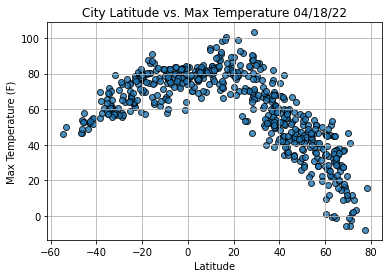

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

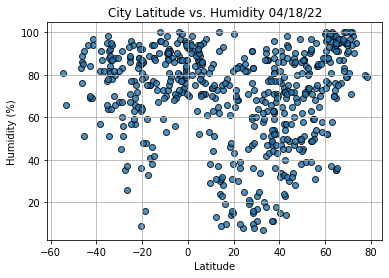

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

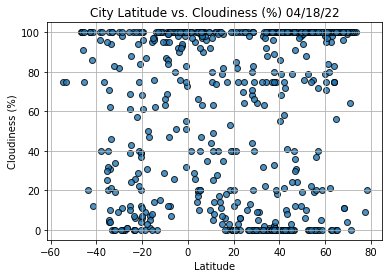

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

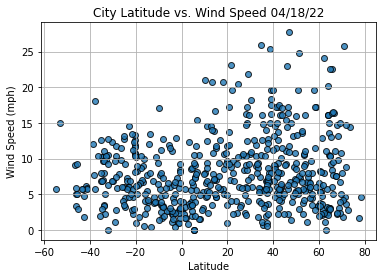

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()